# Strat:

## Class: COMP 4432
### Project: Assignment 1
#### Author: Michael Ghattas

In [ ]:
# Load Required Libraries and Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load dataset
diabetes = load_diabetes()

# Create DataFrame with features
df = pd.DataFrame(data = diabetes.data, columns = diabetes.feature_names)
df['target'] = diabetes.target  # Append the target column

In [9]:
# Descriptive Statistics and Skewness
desc_stats = df.describe()
skewness = df.skew()

print("Descriptive Statistics:")
print(desc_stats)
print("\nSkewness:")
print(skewness)


Descriptive Statistics:
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.7619

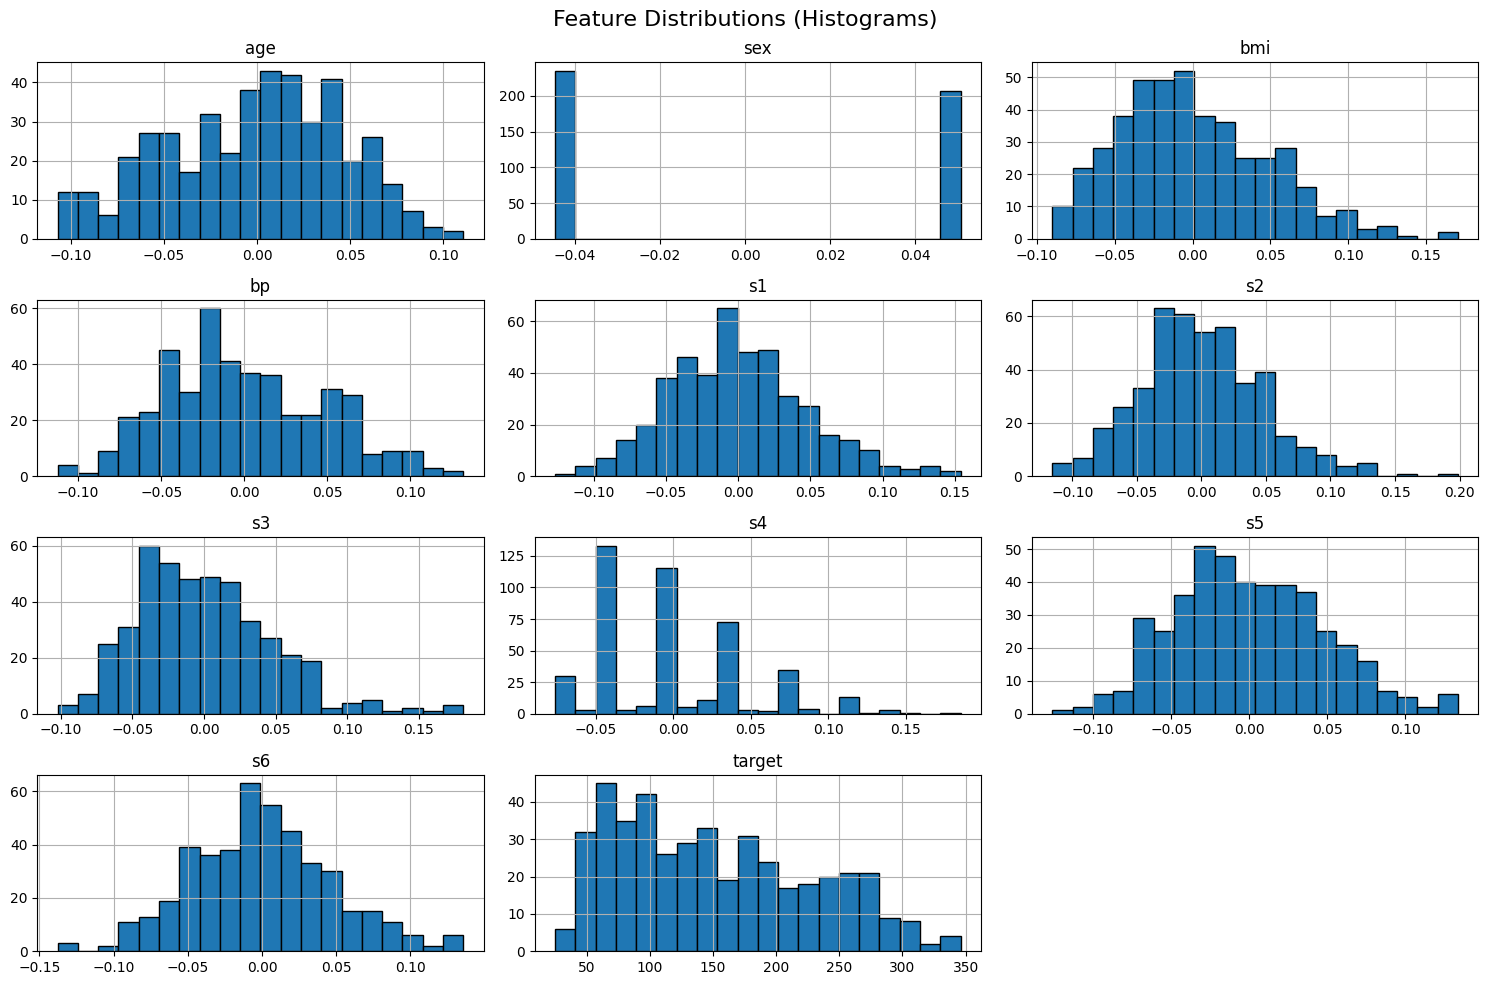

In [ ]:
# Plot Histograms of All Features

df.hist(bins = 20, figsize = (15, 10), edgecolor = 'black')
plt.suptitle("Feature Distributions (Histograms)", fontsize = 16)
plt.tight_layout()
plt.show()

### Descriptive Statistics and Skewness Summary

The predictor variables (`age`, `sex`, `bmi`, `bp`, `s1`-`s6`) are standardized:
- Mean ~0 and Std Dev ~0.0476 for all features
- Values range from approximately -0.13 to +0.20
- This confirms z-score normalization and ensures comparability across predictors

The target (`target`) is unscaled:
- Mean = 152.13, Std Dev = 77.09
- Range: 25 to 346
- Suitable for regression without transformation

Skewness indicates:
- Most features are approximately symmetric (skew < |0.5|)
- `bmi`, `s3`, and `s4` show moderate positive skew (right-tailed)
- No severe skew -> no transformation needed

### Data Distribution Overview

The descriptive statistics confirm that all features are **standardized**:
- Mean ~0, Std Dev ~0.0476 for all predictors
- Target variable (`target`) is **not scaled**, with values ranging from 25 to 346

The histograms support this:
- Most predictors are **centered and symmetric**
- `sex` is **binary**, showing two discrete peaks
- `bmi`, `s3`, and `s4` exhibit **moderate positive skew**, consistent with skewness values > 0.5



In [ ]:
# Compute correlation of features with the target
correlations = df.corr()['target'].drop('target').sort_values(ascending = False)
top_feature = correlations.idxmax()
top_corr = correlations.max()

print(f"Top correlated feature with target: '{top_feature}' (correlation = {top_corr:.4f})")

Top correlated feature with target: 'bmi' (correlation = 0.5865)


### Feature-Target Correlation

The most strongly correlated feature with the target is **`bmi`**, with a correlation coefficient of **0.5865**.

Interpretation:
- This is a **moderate to strong positive linear relationship**, suggesting that higher BMI is associated with higher disease progression scores.
- Among all standardized features, `bmi` is the most informative predictor for a simple linear regression model.
- This justifies selecting `bmi` as the **single predictor** for the initial linear regression analysis.


In [18]:
# Select top feature and target
X = df[[top_feature]]
y = df['target']

# Use 80/20 train-test split with fixed random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

In [20]:
# Create linear regression model
model = LinearRegression()

# Train model using training data
model.fit(X_train, y_train)

LinearRegression()

In [21]:
# Print Coefficients
intercept = model.intercept_
slope = model.coef_[0]

print(f"Intercept: {intercept:.4f}")
print(f"Slope for '{top_feature}': {slope:.4f}")

# Training RMSE
y_train_pred = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

print(f"Training RMSE: {train_rmse:.2f}")

# Standard Deviation of Training Targets
train_std = np.std(y_train)
print(f"Standard Deviation of Training Targets: {train_std:.2f}")

Intercept: 152.0034
Slope for 'bmi': 998.5777
Training RMSE: 62.08
Standard Deviation of Training Targets: 77.95


### Model Fit Evaluation: RMSE vs. Target Variability

- **Training RMSE:** 62.08  
- **Standard Deviation of Target (`y_train`)**: 77.95

**Implication:**
- The RMSE is **lower** than the standard deviation, which indicates that the **linear regression model with `bmi`** as the sole predictor provides a **better prediction than simply using the mean**.
- However, RMSE is still relatively large compared to the target's variability, suggesting that **substantial variance remains unexplained**.

**Conclusion:**  
`bmi` is a valuable predictor, but additional features will likely be needed to build a model with stronger predictive power.


In [22]:
# Testing RMSE
y_test_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Testing RMSE: {test_rmse:.2f}")

Testing RMSE: 63.73


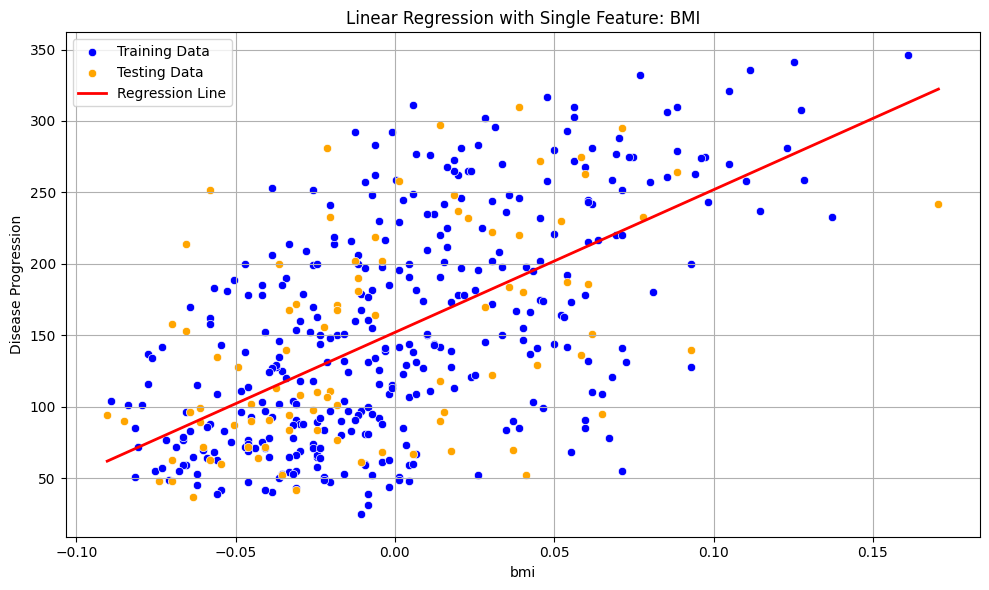

In [23]:
# Scatter Plot with Regression Line
plt.figure(figsize = (10, 6))

# Plot training data
sns.scatterplot(x = X_train[top_feature], y = y_train, label = 'Training Data', color = 'blue')

# Plot testing data
sns.scatterplot(x = X_test[top_feature], y = y_test, label = 'Testing Data', color = 'orange')

# Plot regression line
x_vals = np.linspace(X[top_feature].min(), X[top_feature].max(), 100)
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, label = 'Regression Line', color = 'red', linewidth = 2)

# Labels and legend
plt.xlabel(top_feature)
plt.ylabel("Disease Progression")
plt.title("Linear Regression with Single Feature: BMI")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Scatter Plot with Regression Line

The scatter plot above visualizes the relationship between the most predictive feature (`bmi`) and the target variable (`disease progression`). The training data is plotted in blue and the testing data in orange, allowing us to assess how the model generalizes. The red line represents the linear regression model trained using the training data.

Visualization Elements:
- **x-axis** shows the selected single feature (`bmi`).
- **y-axis** represents the target (`disease progression`).
- **Color coding** distinguishes training (blue) and testing (orange) data.
- **Red regression line** reflects the learned linear relationship.
- **Legend** clearly identifies all components.
- **Title, axis labels, and layout** enhance readability.

The plot helps validate the model's fit and reveals any visible bias or variance, particularly how closely the testing points align with the regression line.

## Note:
### This work has been assisted by GenAI models for the purpose of code debugging, validation, and enhancment. All GenAI assisted output was evaluated, verified, and adopted by author as needed to maintain academic ethical standards of conduct.

# End.